<a href="https://colab.research.google.com/github/Emaperidol/AI_ML_Healthcare/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1**
Create a function to “manually” implement batch gradient descent algorithm for simple linear regression. The function will take the following arguments and output the estimated intercept and coefficient.

Arguments:
eta: learning rate (default to 0.01)
n_iterations: number of iterations (default to 1000)
x_b: feature plus ones
y: target

In particular, generate some random data for x_b and y as follows:

x = 3 * np.random.rand(2000, 1)
y = -10 - 5 * x + np.random.randn(2000, 1)
x_b = np.c_[np.ones((2000, 1)), x]


In [9]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def batch_gradient_descent(eta=0.01, n_iterations=1000, x_b=None, y=None):
    m = len(y)
    theta = np.random.randn(2,1)

    for iteration in range(n_iterations):
        gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
        theta = theta - eta * gradients

    return theta[0][0], theta[1][0]

x = 3 * np.random.rand(2000, 1)
y = -10 - 5 * x + np.random.randn(2000, 1)
x_b = np.c_[np.ones((2000, 1)), x]

intercept, coef = batch_gradient_descent(x_b=x_b, y=y)
print(intercept, coef)



-9.915909650297007 -5.049122105469633


**Question 2**
# generate some data
m = 2000
X = 5 * np.random.rand(m, 1) - 2
y = -2 + 0.5 * X – 1.5 * X ** 2 + np.random.randn(m, 1)

# add polynomial features
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

(1) Fit a linear regression with polynomial terms. Report the estimated intercept and coefficients.

(2) Plot a scatter plot between X and y and overlay with the fitted curve.

(3) Pot the learning curve based on the second-degree polynomial regression.

(4) Plot the learning curve based on the 15-degree polynomial regression.

(5) Compare the above two learning curves. What is your conclusion regarding the potential overfitting of the 15-degree polynomial regression, and why?


Intercept: [-2.00860947]
Coefficients: [[ 0.49468088 -1.51216735]]


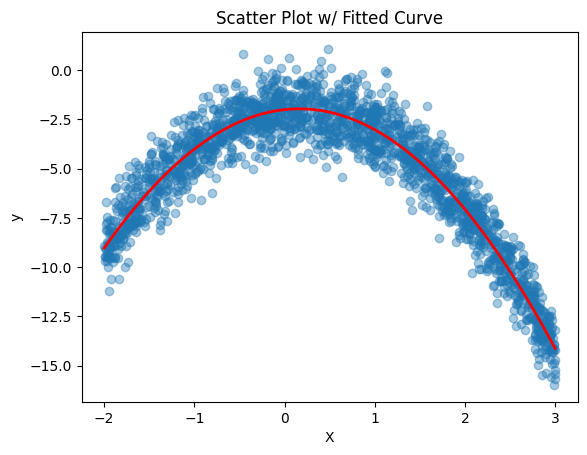

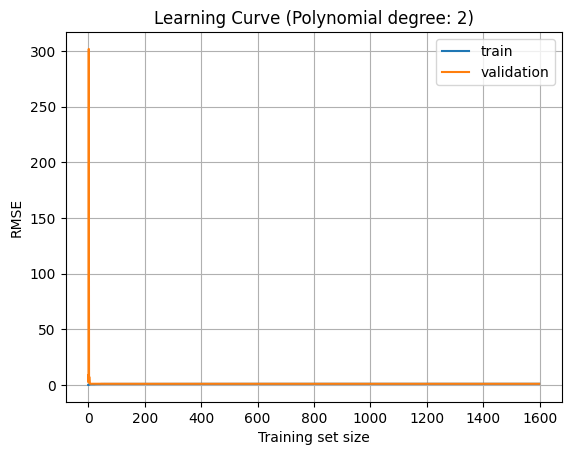

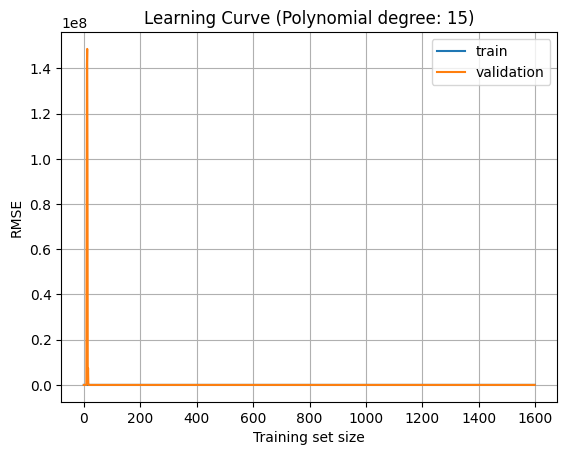

In [10]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

m = 2000
X = 5 * np.random.rand(m, 1) - 2
y = -2 + 0.5 * X - 1.5 * X ** 2 + np.random.randn(m, 1)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

#1
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

#2
plt.scatter(X, y, alpha=0.4)
X_range = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_predict = lin_reg.predict(X_range_poly)
plt.plot(X_range, y_predict, color='r', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter Plot w/ Fitted Curve")
plt.show()

#3
def plot_learning_curve(X, y, degree):
    train_errors, val_errors = [], []
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.2)

    for m in range(1, len(X_train)):
        lin_reg = LinearRegression()
        lin_reg.fit(X_train[:m], y_train[:m])
        y_train_predict = lin_reg.predict(X_train[:m])
        y_val_predict = lin_reg.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), label="train")
    plt.plot(np.sqrt(val_errors), label="validation")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title(f"Learning Curve (Polynomial degree: {degree})")
    plt.legend()
    plt.grid(True)
    plt.show()

#3
plot_learning_curve(X, y, 2)

#4
plot_learning_curve(X, y, 15)

#5 Conclusion
- For the 2nd degree poly, the training and validation  curves should stabalize indicating it will fit the data well
- For the 15th degree poly, theres a gap between the training and validation curve which could mean overfitting - model is too complex


Question 3

In [7]:
from sklearn.linear_model import SGDRegressor, ElasticNet

X = -2 * np.random.rand(1000, 1)
y = 10 + 3 * X + np.random.randn(1000, 1)

#1 Ridge regression
ridge = SGDRegressor(penalty='l2').fit(X, y.ravel())
ridge_prediction = ridge.predict([[2.77]])

#2 Lasso regression
lasso = SGDRegressor(penalty='l1').fit(X, y.ravel())
lasso_prediction = lasso.predict([[2.77]])

#3 ElasticNet regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X, y)
elastic_net_prediction = elastic_net.predict([[2.77]])

print("Ridge Prediction:", ridge_prediction)
print("Lasso Prediction:", lasso_prediction)
print("ElasticNet Prediction:", elastic_net_prediction)



Ridge Prediction: [18.25519669]
Lasso Prediction: [18.34182239]
ElasticNet Prediction: [16.57847856]


Question 4

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('mushrooms.csv')

#2: First and last five rows of the dataframe.
print(df.head())
print(df.tail())
print(f"Total observations: {df.shape[0]}")

#3: Info
print(df.info())

#4: Prevalence of edible mushrooms.
print(df['class'].value_counts())
edible_prevalence = df['class'].value_counts(normalize=True).get('e', 0)
print(f"Prevalence of edible mushrooms: {edible_prevalence:.2f}")

#5: Data split
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#6 & 7 : Fit and transform using one-hot encoding
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

#8: Logistic reg. on train set
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train_encoded, y_train)

#9: Test set predictions
y_pred = clf.predict(X_test_encoded)
print(y_pred)

#10: Accuracy.
initial_accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Accuracy: {initial_accuracy:.2f}")

#11 Grid search for logistic reg
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)
grid_search.fit(X_train_encoded, y_train)

best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test_encoded)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f"Best C value: {grid_search.best_params_['C']}")
print(f"Accuracy using best model: {best_accuracy:.2f}")

difference = best_accuracy - initial_accuracy
print(f"Difference in accuracy: {difference:.2f}")



Saving mushrooms.csv to mushrooms (2).csv
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w              